In [1]:
### load historical data
import pandas as pd

df = pd.read_csv('./datasets/Air_Passengers.csv')
df.head()

,Date,#Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [2]:
### define target variables, covariates and timefeat
### there can be multiple target variables, covariates, but only one timefeat is allowed
### timefeat can also be empty, i.e., timefeat=''
targets = ['#Passengers']
covariates = []
timefeat = 'Date'

###define prediction length, can be 1 to N
###define prediction start step, it's N to last step 
pred_len = 48
pred_start = 24

###choose GTT model variant
modelchoice = 'small'
modelpath = f'./checkpoints/GTT-{modelchoice}'

###whether do 1-order difference before prediction, sometimes set autodiff=True will boost prediction accuracy
autodiff = False

assign mu_head.kernel to mu_head.kernel shape (512, 64) (512, 64)
assign mu_head.bias to mu_head.bias shape (64,) (64,)
assign encoder.layer_norm.gamma to encoder.layer_norm.gamma shape (512,) (512,)
assign encoder.layer_norm.beta to encoder.layer_norm.beta shape (512,) (512,)
assign encoder.patch_embedding.conv1.kernel to encoder.patch_embedding.conv1.kernel shape (64, 1, 512) (64, 1, 512)
assign encoder.patch_embedding.conv1.bias to encoder.patch_embedding.conv1.bias shape (512,) (512,)
assign encoder.encoder_layers.0.temporal_attn_layer_norm.gamma to encoder.encoder_layers.0.temporal_attn_layer_norm.gamma shape (512,) (512,)
assign encoder.encoder_layers.0.temporal_attn_layer_norm.beta to encoder.encoder_layers.0.temporal_attn_layer_norm.beta shape (512,) (512,)
assign encoder.encoder_layers.0.channel_attn_layer_norm.gamma to encoder.encoder_layers.0.channel_attn_layer_norm.gamma shape (512,) (512,)
assign encoder.encoder_layers.0.channel_attn_layer_norm.beta to encoder.encoder_laye

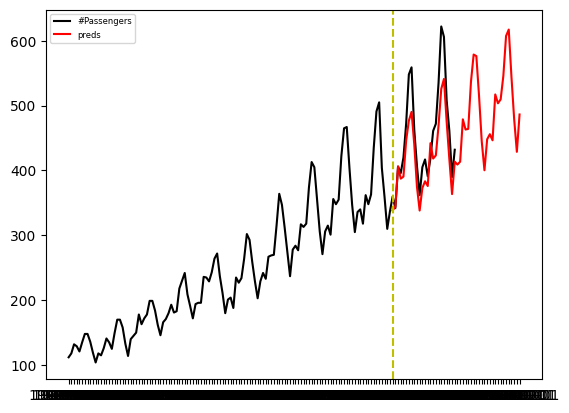

In [4]:
###use GTT model to conduct forecast, and plot results
from src.apis import zeroshot_api
res = zeroshot_api.forecast(df, targets, covariates, timefeat, pred_len, pred_start, modelpath, autodiff=autodiff)
if res['ret'] == 'success':
    zeroshot_api.plot_res(res)
else:
    print(res)